# Basics

To obtain an ordered numpy array of stands connected to the DP system at a particular station:

In [12]:
from lsl.common import stations

lwa1 = stations.lwa1
stands = lwa1.stands

print(stands[:3])
print(len(stands))

for i in range(5):
    print(str(stands[i]))

[<lsl.common.stations.Stand object at 0x115b36f98>, <lsl.common.stations.Stand object at 0x115b36f98>, <lsl.common.stations.Stand object at 0x115b36ac8>]
520
Stand 173:  x=-25.00 m, y=+23.16 m, z=+0.91 m
Stand 173:  x=-25.00 m, y=+23.16 m, z=+0.91 m
Stand 151:  x=-24.75 m, y=+47.92 m, z=+0.14 m
Stand 151:  x=-24.75 m, y=+47.92 m, z=+0.14 m
Stand 222:  x=-38.84 m, y=+14.45 m, z=+1.27 m


Although the stand list is useful, it is more useful to have a list of lsl.common.stations.Antenna instances. This provide much more information about the station setup (stand, FEE, position, etc.) than the simple stands list. To get this list:

In [13]:
antennas = lwa1.antennas

print(antennas[:3])
print(len(antennas))

for i in range(5):
    print(str(antennas[i]))

[<lsl.common.stations.Antenna object at 0x115bb8358>, <lsl.common.stations.Antenna object at 0x115bb8438>, <lsl.common.stations.Antenna object at 0x115baac18>]
520
Antenna 345: stand=173, polarization=0; digitizer 1; status is 3
Antenna 346: stand=173, polarization=1; digitizer 2; status is 3
Antenna 301: stand=151, polarization=0; digitizer 3; status is 3
Antenna 302: stand=151, polarization=1; digitizer 4; status is 3
Antenna 443: stand=222, polarization=0; digitizer 5; status is 3


## Stand Positions

Once you have an array of lsl.common.stations.Antenna instances you can do lots of things.  For example, to get the location of stand #31 you can:

In [14]:
for ant in antennas:
    if ant.stand.id == 31 and ant.pol == 0:
        print(str(ant.stand))
        print(ant.stand.x, ant.stand.y, ant.stand.z)

Stand 31:  x=-4.00 m, y=-21.76 m, z=+2.18 m
-3.997 -21.764 2.183


Or to get the distance between stand #31 and stand #45:

In [15]:
import math

ant31 = None
ant45 = None
for ant in antennas:
    if ant.stand.id == 31 and ant.pol == 0:
        ant31 = ant
        print(str(ant.stand))
    elif ant.stand.id == 45 and ant.pol == 0:
        ant45 = ant
        print(str(ant.stand))
        
dx,dy,dz = ant31.stand-ant45.stand
print(math.sqrt( dx**2 + dy**2 + dz**2 ))

Stand 45:  x=-7.60 m, y=+21.16 m, z=+0.83 m
Stand 31:  x=-4.00 m, y=-21.76 m, z=+2.18 m
43.09846897512718


In both of these examples, there is an extra "ant.pol == 0" in the "if" statement that selects the stands.  This is needed because each stand has two dipole antennas, one for each polarization.  If this extra requirement wasn't inlcuded, you'd have two matches:

In [16]:
for ant in antennas:
    if ant.stand.id == 31:
        print(str(ant.stand), ant.pol)
        print(ant.stand.x, ant.stand.y, ant.stand.z)

Stand 31:  x=-4.00 m, y=-21.76 m, z=+2.18 m 0
-3.997 -21.764 2.183
Stand 31:  x=-4.00 m, y=-21.76 m, z=+2.18 m 1
-3.997 -21.764 2.183


## Cable Information

lsl.common.statations.Antennas instance know more than just the stand location and name.  They also store information about the cable that connects the antenna to the shelter and has methods to compute the cable delay and loss:

Cable delay for 'EXK-173-115 (Gray)' @ 49 MHz: 467.5 ns
Cable gain @ 49 MHz: 0.1110


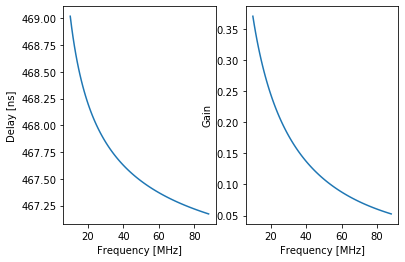

In [17]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

ant = antennas[0]

print("Cable delay for '%s' @ 49 MHz: %.1f ns" % (ant.cable.id, ant.cable.delay(49e6)*1e9,))
print("Cable gain @ 49 MHz: %.4f" % ant.cable.gain(49e6))

freqs = np.linspace(10e6, 88e6, 101)
delays = ant.cable.delay(freqs)
gains = ant.cable.gain(freqs)

fig = plt.figure()
axD = fig.add_subplot(1, 2, 1)
axD.plot(freqs/1e6, delays*1e9)
axD.set_xlabel("Frequency [MHz]")
axD.set_ylabel("Delay [ns]")

axG = fig.add_subplot(1, 2, 2)
axG.plot(freqs/1e6, gains)
axG.set_xlabel("Frequency [MHz]")
axG.set_ylabel("Gain")
plt.show()

# Computing uv Tracks

lsl.common.statations.Antennas instance are also used by other LSL routines.  For example, uv tracks can be computed with:

(120, 2, 512)


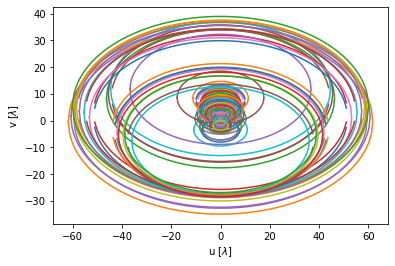

In [18]:
from lsl.correlator import uvutils

uv = uvutils.compute_uv_track(antennas[:32:2])
print(uv.shape)

fig = plt.figure()
ax = fig.gca()
for i in range(uv.shape[0]):
    ax.plot(uv[i,0,:], uv[i,1,:])
ax.set_xlabel('u [$\\lambda$]')
ax.set_ylabel('v [$\\lambda$]')
plt.show()